In [80]:
import tensorflow as tf

In [81]:
# Loads mnist fashion dataset
fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()

In [82]:
# fashion_mnist is a dataset of 60k images of fashion categories, along with 10k images test set.
# It returns a Tuple of NumPy arrays: (x_train, y_train), (x_test, y_test), hence the following code
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
# Set training sets for first 55,000 images
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
# Set validation sets for last 5000 images in full training set
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

In [83]:
X_train.shape

(55000, 28, 28)

In [84]:
X_train.dtype

dtype('uint8')

In [85]:
# Scale the pixel intensities down to the 0-1 range by dividing them by 255
X_train, X_valid, X_test = X_train / 255.0, X_valid / 255.0, X_test / 255.0

In [86]:
# Create class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [87]:
y_train[0]

9

In [88]:
# The first image in the training set represents an ankle boot
class_names[y_train[0]]

'Ankle boot'

In [89]:
# Creating the model using the sequential API
# Reset state data (reset the layer name counters)
tf.keras.backend.clear_session()
# Set random seed to replicate results. The random weights of the hidden layers and the output layer will be the same every time you run the notebook
tf.random.set_seed(42)
# Create a Sequential model (the simplest kind of Keras model)
model = tf.keras.Sequential()
# Build the first input layer. Specify the input shape, which is the shape of the instances
model.add(tf.keras.layers.Input(shape=[28, 28]))
# Add a Flatten layer. This converts each input image into a 1D array. For ex, if it receives a batch of shape [32, 28, 28],
# it will reshape it to [32, 784]
model.add(tf.keras.layers.Flatten())
# Next we add a Dense hidden layer with 300 neurons. It will use the ReLU activation function
model.add(tf.keras.layers.Dense(units=300, activation="relu"))
# Add a second Dense layer with 100 neurons, also using ReLU
model.add(tf.keras.layers.Dense(units=100, activation="relu"))
# Add a Dense output layer with 10 neurons (one per class), using the softmax activation func because the classes are exclusive
model.add(tf.keras.layers.Dense(units=10, activation="softmax"))

# Alternatively, instead of writing out the layers one by one, you can pass a list of layers when you create the model

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


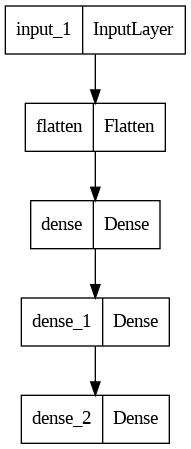

In [91]:
# Graphical image of model
tf.keras.utils.plot_model(model)

In [92]:
# Model layers
model.layers

In [93]:
# access layer by name
hidden1 = model.layers[1]
hidden1.name

'dense'

In [94]:
model.get_layer('dense') is hidden1

True

In [95]:
# access layer parameters
weights, biases = hidden1.get_weights()
weights
# Note that the weights were initialized randomly, which is needed to break the symmetry (biases can all be the same). If you want to use a different initialization method, can use kernel_initiliazer or bias_initializer
# 'kernel' is another name for the matrix of connection weights

array([[ 0.0673829 ,  0.05341366,  0.01593384, ...,  0.05233532,
         0.02636886, -0.00271111],
       [ 0.04709803, -0.06214918, -0.04252287, ..., -0.0574257 ,
        -0.02062618, -0.04184793],
       [ 0.02089863,  0.02580095,  0.01490205, ..., -0.01313568,
         0.07406314,  0.06134757],
       ...,
       [ 0.00083627,  0.02155678, -0.07241951, ...,  0.05973889,
        -0.05244869, -0.06934048],
       [-0.04776094,  0.02538125, -0.03483589, ...,  0.0574103 ,
        -0.06879029, -0.02314162],
       [-0.04385319, -0.03554627, -0.02977489, ...,  0.05093528,
        -0.02315139,  0.05674973]], dtype=float32)

In [96]:
weights.shape

(784, 300)

In [97]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [98]:
biases.shape

(300,)

In [99]:
# After the model is created, you must call its compile() method to specify the loss function and the optimizer
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

# We use "sparse_categorical_crossentropy" because we have sparse labels (ie, for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive
# NOTE: When using the SGD optimizer, you will generally want to use optimizer=tf.keras.optimizers.SGD(learning_rate=__???__) rather than optimizer='sgd', which defaults to a learning rate of .01

In [100]:
# Now the model is ready to be trained. For this we simply need to call its fit() method:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

# We pass it the input features (X_train) and the target classes (y_train) as well as the # of epochs to train (the default is 1, which is not enough to converge to a good solution)
# The validation set is optional, but Keras will measure the loss and the extra metrics on this set at the end of each epoch, which is very useful to see how well the model really performs
# If the performance on the training set is much better than on the validation set, your model is probably overfitting (or there is a bug, such as a data mismatch between the training set and validation set)

# Shape errors are quite common. Try fitting a model with inputs and/or labels of the wrong shape and see the errors you get. Also, try compiling the model with loss="categorical_crossentropy" instead; or remove the Flatten layer, etc.


Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.7108 - accuracy: 0.7657 - val_loss: 0.5070 - val_accuracy: 0.8254
Epoch 2/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.4862 - accuracy: 0.8306 - val_loss: 0.4611 - val_accuracy: 0.8360
Epoch 3/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4393 - accuracy: 0.8455 - val_loss: 0.4200 - val_accuracy: 0.8518
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4151 - accuracy: 0.8545 - val_loss: 0.3967 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3946 - accuracy: 0.8619 - val_loss: 0.3918 - val_accuracy: 0.8624
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3786 - accuracy: 0.8668 - val_loss: 0.4008 - val_accuracy: 0.8610
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3670 - accuracy: 0.8695 - val_loss: 0.3724 - val_accur

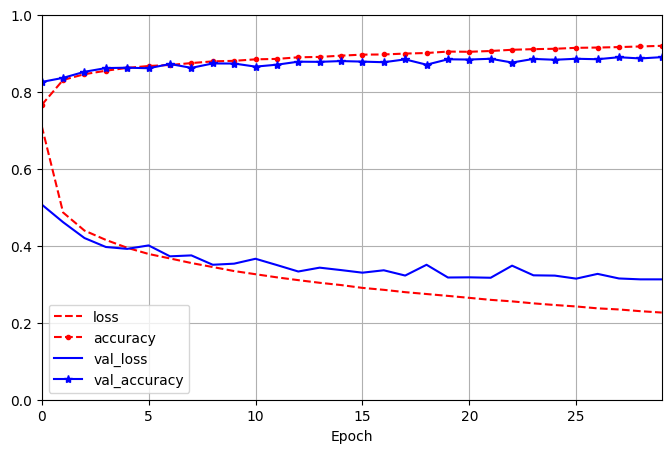

In [102]:
# If the training set is skewed, with some classes overrepresented/underrepresented, you can set the class_weight argument when calling fit()
# can use dict in history.history to create a pandas DF to get learning curves:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"]
)
plt.show()

In [104]:
# If you want to continue training, you can call fit() again:
history = model.fit(X_train, y_train, epochs=40, initial_epoch=30,
                    validation_data=(X_valid, y_valid))

Epoch 31/40
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2169 - accuracy: 0.9222 - val_loss: 0.3403 - val_accuracy: 0.8812
Epoch 32/40
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2153 - accuracy: 0.9231 - val_loss: 0.3287 - val_accuracy: 0.8846
Epoch 33/40
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2102 - accuracy: 0.9255 - val_loss: 0.3122 - val_accuracy: 0.8874
Epoch 34/40
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2082 - accuracy: 0.9264 - val_loss: 0.3085 - val_accuracy: 0.8904
Epoch 35/40
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2046 - accuracy: 0.9259 - val_loss: 0.3158 - val_accuracy: 0.8876
Epoch 36/40
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2007 - accuracy: 0.9286 - val_loss: 0.3245 - val_accuracy: 0.8860
Epoch 37/40
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1990 - accuracy: 0.9281 - val_loss: 0.3167 - va

In [105]:
# Here is where you could tune your model's hyperparameters, if you wish. Once you are satisfied with your model's validation accuracy, you should evalute it on the test set to estimate the generalization error
# before you deploy the model to production
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3261 - accuracy: 0.8868


[0.3260718584060669, 0.8867999911308289]

In [107]:
# Now let's use the model's predict() method to make predictions on new instances. Since we don't have actual new instances, we'll just use the first 3 instances of the test set:
X_new = X_test[:3]
y_proba = model.predict(X_new)
# Show predictions, rounded
y_proba.round(3)

1/1 [==============================] - 0s 21ms/step


array([[0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.   , 0.011, 0.   ,
        0.989],
       [0.   , 0.   , 0.999, 0.   , 0.001, 0.   , 0.   , 0.   , 0.   ,
        0.   ],
       [0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
        0.   ]], dtype=float32)

In [108]:
# If you only care about the class with the highest estimated probability (even if that probability is quite low), you can use the argmax() method to get the highest probability class index for each instance:
import numpy as np
# Create array with the indices of the highest probabilities
y_pred = y_proba.argmax(axis=-1)
y_pred

array([9, 2, 1])

In [109]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [110]:
y_new = y_test[:3]
y_new
# It classified all three images correctly

array([9, 2, 1], dtype=uint8)

In [111]:
# Save model as a TF SavedModel
model.save("my_keras_model", save_format="tf")